---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Data Preparation

## Environment Setup

In [1]:
# Import the packages we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import plotly.figure_factory as ff
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.ticker as mtick
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score    
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

Load the libraries required in this study, mainly data processing libraries, machine learning algorithm libraries, clustering algorithm libraries and interactive visualization libraries.

## Load Data


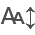

In [3]:
#| echo: true 
#| code-fold: true
from itables import init_notebook_mode, show
df = pd.read_csv("real_estate_utah.csv")
init_notebook_mode(all_interactive=False)
show(df)

Demonstrate the overall value of the dataset

## Descriptive analysis

In [4]:
#| echo: true 
#| code-fold: true
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


Outputs a brief summary showing information about the dataframe, including the index's datatype dtype and the column's datatype dtype, the number of non-null values, and memory usage.

In [ ]:
#| echo: true 
#| code-fold: true
df.describe().T

,count,mean,min,25%,50%,75%,max,std
beds,4421.0,3.898665,1.0,3.0,4.0,4.0,19.0,1.266574
baths,4421.0,2.452839,0.0,2.0,3.0,3.0,45.0,1.792608
baths_full,4421.0,2.239086,1.0,2.0,2.0,3.0,45.0,1.167265
baths_half,4421.0,1.025107,1.0,1.0,1.0,1.0,6.0,0.195083
garage,4421.0,2.335897,0.0,2.0,2.0,2.0,20.0,1.026591
lot_sqft,4421.0,554838.609138,436.0,9583.0,13939.0,24829.0,600953760.0,11369016.504254
stories,4421.0,2.000679,1.0,2.0,2.0,2.0,4.0,0.629407
lastSoldOn,4421,2017-06-28 00:07:09.947975680,1995-08-15 00:00:00,2018-05-31 00:00:00,2018-05-31 00:00:00,2018-05-31 00:00:00,2024-01-30 00:00:00,NaN
age,4421.0,27.078941,-1.0,18.0,22.0,28.0,165.0,23.657422
pricePerSqft,4421.0,272.359367,0.625,167.225951,224.675886,294.125,8312.5,380.219469


count: the number of non-null values in each column

mean: the mean of each column

std: standard deviation of each column

min: minimum value

25%: 25% quantile, after sorting the number in the 25% position

50%: 50% quartile

75%: 75% quartile

max:maximum value

## Missing value analysis

<Axes: >

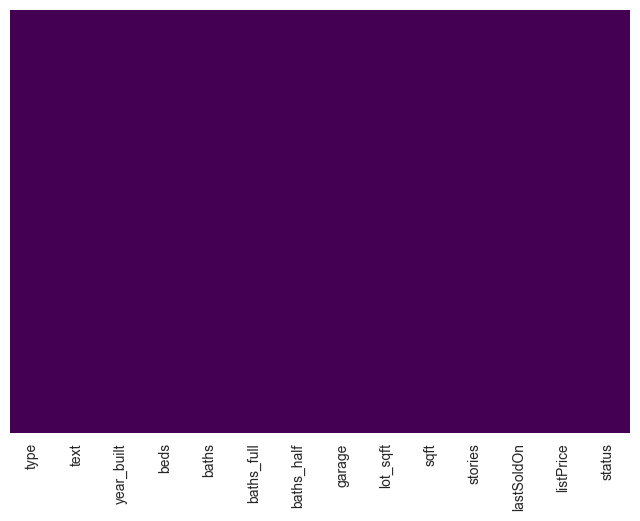

In [6]:
#| echo: true 
#| code-fold: true
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Visual inspection of missing values

Checking for missing data revealed no missing values for the variables in the dataset.

In [7]:
#| echo: true 
#| code-fold: true
type_mapping = {
    'single_family': 'single_family',
    'land': 'land',
    'townhomes': 'townhome',
    'townhouse': 'townhome',
    'mobile': 'mobile',
    'condos': 'condo',
    'condo_townhome_rowhome_coop': 'condo',
    'condo_townhome': 'condo',
    'condo': 'condo',
    'other': 'other',
    'farm': 'farm'
}

## Feature engineering

In [8]:
#| echo: true 
#| code-fold: true
df['type'] = df['type'].map(type_mapping)
df['year_built'] = df['year_built'].astype('int')
df['age'] = pd.to_datetime('today').year - df['year_built']
df= df.loc[(df["sqft"] > 0.0) & (df['listPrice'] > 0.0)]
df['pricePerSqft'] = df['listPrice'] / df['sqft'] #create feature
df.drop('year_built', axis=1, inplace=True)
df['lastSoldOn'] = pd.to_datetime(df['lastSoldOn'])
df = df.drop(['listPrice','sqft'],axis=1)